## Welcome back to Python Notebooks!

Didja miss me??

### And welcome to Week 4, Day 2 - introducing LangGraph!

In [1]:
# from typing import Annotated
# from langgraph.graph import StateGraph, START, END
# from langgraph.graph.message import add_messages
# from dotenv import load_dotenv
# from IPython.display import Image, display
# import gradio as gr
# from langgraph.graph import StateGraph
# from langgraph.graph.message import add_messages
# from langchain_openai import ChatOpenAI
# from pydantic import BaseModel
# import random

from typing import Annotated
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from dotenv import load_dotenv
from IPython.display import Image, display
import gradio as gr
from langchain_openai import ChatOpenAI
from pydantic import BaseModel
import random

In [2]:
# Some useful constants

nouns = ["Cabbages", "Unicorns", "Toasters", "Penguins", "Bananas", "Zombies", "Rainbows", "Eels", "Pickles", "Muffins"]
adjectives = ["outrageous", "smelly", "pedantic", "existential", "moody", "sparkly", "untrustworthy", "sarcastic", "squishy", "haunted"]

In [3]:
# Our favorite first step! Crew was doing this for us, by the way.
load_dotenv(override=True)


True

In [ ]:
# def shout(text: Annotated[str, "something to be shouted"]) -> str:
#     print(text.upper())
#     return text.upper()

# shout("hello")

def shout(text: Annotated[str, "something to be shouted"]) -> str:
    print(text.upper())
    return text
    
shout('abcd')

ABCD


'abcd'

### A word about "Annotated"

You probably know this; type hinting is a feature in Python that lets you specify the type of something:

`my_favorite_things: List`

But you may not know this:

You can also use something called "Annotated" to add extra information that somebody else might find useful:

`my_favorite_things: Annotated[List, "these are a few of mine"]`

LangGraph needs us to use this feature when we define our State object.

It wants us to tell it what function it should call to update the State with a new value.

This function is called a **reducer**.

LangGraph provides a default reducer called `add_messages` which takes care of the most common case.

And that hopefully explains why the State looks like this.




### Step 1: Define the State object

You can use any python object; but it's most common to use a TypedDict or a Pydantic BaseModel.

In [7]:

# class State(BaseModel):
        
#     messages: Annotated[list, add_messages]

class State(BaseModel):

    messages: Annotated[list, add_messages]


### Step 2: Start the Graph Builder with this State class

In [8]:
# graph_builder = StateGraph(State)

graph_builder = StateGraph(State)

### Step 3: Create a Node

A node can be any python function.

The reducer that we set before gets automatically called to combine this response with previous responses


In [9]:
# def our_first_node(old_state: State) -> State:

#     reply = f"{random.choice(nouns)} are {random.choice(adjectives)}"
#     messages = [{"role": "assistant", "content": reply}]

#     new_state = State(messages=messages)

#     return new_state

# graph_builder.add_node("first_node", our_first_node)

def our_first_node(old_state: State) -> State:

    reply = f"{random.choice(nouns)} are {random.choice(adjectives)}"
    messages = [{"role": "assistant", "content": reply}]

    new_state = State(messages=messages)

    return new_state

graph_builder.add_node("first_node", our_first_node)

### Step 4: Create Edges

In [10]:
# graph_builder.add_edge(START, "first_node")
# graph_builder.add_edge("first_node", END)

graph_builder.add_edge(START, "first_node")
graph_builder.add_edge("first_node", END)

### Step 5: Compile the Graph

In [11]:
# graph = graph_builder.compile()
graph = graph_builder.compile()

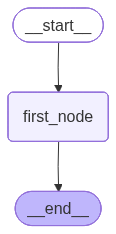

In [12]:
# display(Image(graph.get_graph().draw_mermaid_png()))
display(Image(graph.get_graph().draw_mermaid_png()))

### That's it! Showtime!

In [ ]:
# def chat(user_input: str, history):
#     message = {"role": "user", "content": user_input}
#     messages = [message]
#     state = State(messages=messages)
#     result = graph.invoke(state)
#     print(result)
#     return result["messages"][-1].content


# gr.ChatInterface(chat, type="messages").launch()

def chat(user_input: str, history):
    message = {"role": "user", "content": user_input}
    messages = [message]
    state = State(messages=messages)
    result = graph.invoke(state)
    print(result)
    return result["messages"][-1].content

gr.ChatInterface(chat, type="messages").launch()


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


{'messages': [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}, id='746caa54-7e6d-432b-8628-96e0225e0847'), AIMessage(content='Zombies are sarcastic', additional_kwargs={}, response_metadata={}, id='3e75bffb-5551-4408-b2fc-c61678f6cf07')]}
{'messages': [HumanMessage(content='what', additional_kwargs={}, response_metadata={}, id='da6a333c-f458-4ae7-8700-9502e6ad430a'), AIMessage(content='Muffins are squishy', additional_kwargs={}, response_metadata={}, id='1e639a31-c7e8-4448-9361-a7150721d9e5')]}
{'messages': [HumanMessage(content='what', additional_kwargs={}, response_metadata={}, id='c8ff180a-0f82-4da0-b40a-3be4ccc76bd7'), AIMessage(content='Bananas are haunted', additional_kwargs={}, response_metadata={}, id='09a90f78-73ed-4858-954c-04d1fd401d8f')]}
{'messages': [HumanMessage(content='what', additional_kwargs={}, response_metadata={}, id='451cdda0-a566-47a5-b1b0-6b2ad556db11'), AIMessage(content='Rainbows are squishy', additional_kwargs={}, response_metadata={}, 

### But why did I show you that?

To make the point that LangGraph is all about python functions - it doesn't need to involve LLMs!!

Now we'll do the 5 steps again, but in 1 shot:

In [15]:
# Step 1: Define the State object
# class State(BaseModel):
#     messages: Annotated[list, add_messages]

class State(BaseModel):
    messages: Annotated[list, add_messages]


In [16]:
# Step 2: Start the Graph Builder with this State class
# graph_builder = StateGraph(State)
graph_builder = StateGraph(State)


In [17]:
# Step 3: Create a Node

# llm = ChatOpenAI(model="gpt-4o-mini")

# def chatbot_node(old_state: State) -> State:
#     response = llm.invoke(old_state.messages)
#     new_state = State(messages=[response])
#     return new_state

# graph_builder.add_node("chatbot", chatbot_node)

llm = ChatOpenAI(model="gpt-4o-mini")

def chatbot_node(old_state: State) -> State:
    response = llm.invoke(old_state.messages)
    new_state = State(messages=[response])
    return new_state

graph_builder.add_node("chatbot", chatbot_node)

In [18]:
# Step 4: Create Edges
# graph_builder.add_edge(START, "chatbot")
# graph_builder.add_edge("chatbot", END)

graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

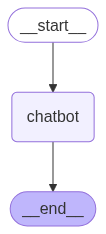

In [19]:
# Step 5: Compile the Graph
# graph = graph_builder.compile()
# display(Image(graph.get_graph().draw_mermaid_png()))

graph = graph_builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

### That's it! And, let's do this:

In [ ]:
# def chat(user_input: str, history):
#     initial_state = State(messages=[{"role": "user", "content": user_input}])
#     result = graph.invoke(initial_state)
#     print(result)
#     return result['messages'][-1].content

def chat(user_input: str, history):
    initial_state = State(messages=[{"role": "user", "content": user_input}])
    result = graph.invoke(initial_state)
    print(result)
    return result['messages'][-1].content

# gr.ChatInterface(chat, type="messages").launch()
gr.ChatInterface(chat, type="messages").launch()

* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.


{'messages': [HumanMessage(content='hello', additional_kwargs={}, response_metadata={}, id='d670efbf-c2d0-467e-b1d4-86df1c56c9cd'), AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_51db84afab', 'id': 'chatcmpl-CJDU8kBsAWqQqAbFvVNgU2AhmhQ9w', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--d6e4ef54-5041-47f8-bc5b-312753e8ebb1-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}
{'messages': [HumanMessage(content='